In [1]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
print(data.shape) # (42000, 785)

(42000, 785)


In [4]:
data = np.array(data)

In [5]:
def showImage(data: np.ndarray, *, fig_size: tuple = (1, 1), img_size: int = 28) -> None:
    # Extract the first 784 values (pixel intensities)
    image_data = data[:-1]
    
    # Reshape the flattened data to a 28x28 matrix
    image_matrix = np.array(image_data).reshape(img_size, img_size)
    
    plt.figure(figsize=fig_size)
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')  # Hide axis labels and ticks
    plt.show()

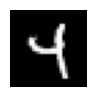

In [6]:
showImage(data[1])

In [7]:
def show_images_in_grid(image_data_list: np.ndarray, *, grid_size: tuple = (4, 4), fig_size: tuple = (4, 4), img_size: int = 28) -> None:
    num_images = len(image_data_list)
    
    num_rows = grid_size[0]
    num_cols = grid_size[1]
    
    if num_images < num_rows * num_cols:
        raise ValueError("Not enough images to fill the grid.")
    
    fig, ax = plt.subplots(num_rows, num_cols, figsize=fig_size)
    
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            image_data = image_data_list[index]
            
            pixel_values = image_data[:-1]
            
            image_matrix = np.array(pixel_values).reshape(img_size, img_size)
            ax[i, j].imshow(image_matrix, cmap='gray')
            ax[i, j].axis('off')  # Hide axis labels and ticks
    
    plt.tight_layout()
    plt.show()

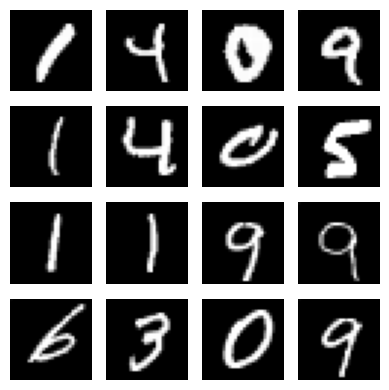

In [8]:
show_images_in_grid(data[:16])

In [9]:
random_image_data = np.random.randint(0, 256, size=(785, ))
my_image_data = np.array([
    #--------------------------!---------------------------
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0, #####
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [10]:
data_dev = data[0:1000].T
print(data[0])
showImage(X_dev[0])
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.
# 
# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255.
# _,m_train = X_train.shape

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 233 253  64
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   9 155 252 252 189   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 130 252 252
 252 237  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  62 236 252 252 252 245  5

ValueError: cannot reshape array of size 999 into shape (28,28)